<a href="https://colab.research.google.com/github/jg116907/BOJ_algorithm/blob/master/Text_data_classification_eng_EDA_and_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텍스트 분류
- 자연어 처리 기술을 활용해 글의 정보를 추출해서 문제에 맞게 사람이 정한 범주(Class)로 분류하는 문제


## 영어 텍스트 분류
- Kaggle의 Bag of Words Meets Bags of Popcorn 데이터를 이용한 감정 분류 실습
### 1. EDA

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# 자신의 kaggle account에서 api key 생성 후 kaggle.json 업로드
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c word2vec-nlp-tutorial

  0% 0.00/276k [00:00<?, ?B/s]
100% 276k/276k [00:00<00:00, 41.8MB/s]
 42% 11.0M/26.0M [00:00<00:00, 21.6MB/s]
100% 26.0M/26.0M [00:00<00:00, 52.9MB/s]
 71% 9.00M/12.6M [00:00<00:00, 24.5MB/s]
100% 12.6M/12.6M [00:00<00:00, 32.0MB/s]
 69% 9.00M/13.0M [00:00<00:00, 24.9MB/s]
100% 13.0M/13.0M [00:00<00:00, 32.4MB/s]


In [0]:
# 압축 해제
import zipfile

DATA_IN_PATH = '/content/'
file_list=['labeledTrainData.tsv.zip','testData.tsv.zip','unlabeledTrainData.tsv.zip']
for file in file_list:
  zipRef = zipfile.ZipFile(DATA_IN_PATH + file,"r")
  zipRef.extractall(DATA_IN_PATH)
  zipRef.close()

In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
train_data = pd.read_csv(DATA_IN_PATH+"labeledTrainData.tsv",header=0,delimiter="\t",quoting=3)

In [10]:
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


1. 데이터의 크기 확인

In [11]:
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
  if 'tsv' in file and 'zip' not in file:
    print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file)/1000000,2))+'MB')

파일 크기 : 
labeledTrainData.tsv          33.56MB
unlabeledTrainData.tsv        67.28MB
testData.tsv                  32.72MB


2. 데이터의 개수 확인

In [12]:
print("전체 학습 데이터의 개수 :",len(train_data))

전체 학습 데이터의 개수 : 25000


3. 각 리뷰의 길이 분포

In [13]:
train_length = train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

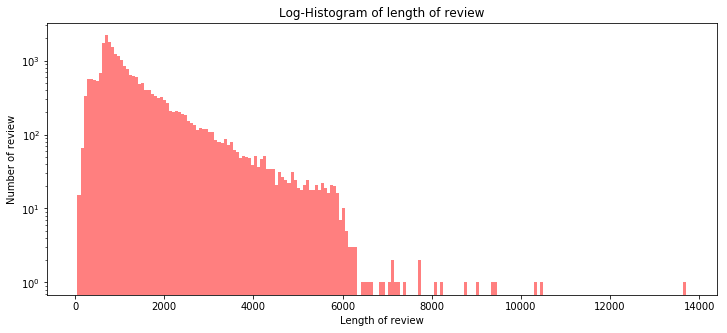

In [14]:
# 각 리뷰의 길이 시각화
plt.figure(figsize=(12,5))
plt.hist(train_length,bins=200,alpha=0.5,color='r',label='word')
plt.yscale('log',nonposy='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')
plt.show()

In [15]:
# 리뷰 길이에 대한 통계값 확인
import numpy as np

print("리뷰 최대 길이 : ",np.max(train_length))
print("리뷰 최소 길이 : ",np.min(train_length))
print("리뷰 평균 길이 : ",np.mean(train_length))
print("리뷰 길이 표준편차 : ",np.std(train_length))
print("리뷰 중간 길이 : ",np.median(train_length))
print("제 1사분위 길이 : ",np.percentile(train_length,25))
print("제 3사분위 길이 : ",np.percentile(train_length,75))

리뷰 최대 길이 :  13710
리뷰 최소 길이 :  54
리뷰 평균 길이 :  1329.71056
리뷰 길이 표준편차 :  1005.2191407969154
리뷰 중간 길이 :  983.0
제 1사분위 길이 :  705.0
제 3사분위 길이 :  1619.0


4. 각 리뷰의 단어 개수 분포

In [0]:
train_word_count = train_data['review'].apply(lambda x:len(x.split(' ')))

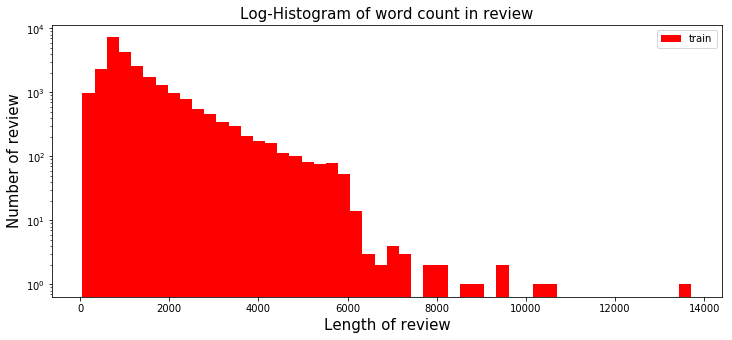

In [43]:
# 시각화
plt.figure(figsize=(12,5))
plt.hist(train_length,bins=50,color='r',label='train')
plt.yscale('log',nonposy='clip')
plt.title('Log-Histogram of word count in review',fontsize=15)
plt.xlabel('Length of review',fontsize=15)
plt.ylabel('Number of review',fontsize=15)
plt.legend()
plt.show()

In [18]:
print("리뷰 단어 개수 최대값 : ",np.max(train_word_count))
print("리뷰 단어 개수 최소값 : ",np.min(train_word_count))
print("리뷰 단어 개수 평균값 : ",np.mean(train_word_count))
print("리뷰 단어 개수 표준편차 : ",np.std(train_word_count))
print("리뷰 단어 개수 중간값 : ",np.median(train_word_count))
print("리뷰 단어 개수 제 1사분위 : ",np.percentile(train_word_count,25))
print("리뷰 단어 개수 제 3사분위 : ",np.percentile(train_word_count,75))

리뷰 단어 개수 최대값 :  2470
리뷰 단어 개수 최소값 :  10
리뷰 단어 개수 평균값 :  233.78624
리뷰 단어 개수 표준편차 :  173.74237015380743
리뷰 단어 개수 중간값 :  174.0
리뷰 단어 개수 제 1사분위 :  127.0
리뷰 단어 개수 제 3사분위 :  284.0


5. 각 리뷰의 구두점, 대소문자 비율

In [19]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper())) # 첫 번째 대문자
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x]))) # 대문자 개수
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x]))) # 숫자 개수

print("물음표가 있는 리뷰 : {:.2f}%".format(qmarks*100))
print("마침표가 있는 리뷰 : {:.2f}%".format(fullstop*100))
print("첫 글자가 대문자인 리뷰 : {:.2f}%".format(capital_first*100))
print("대문자가 있는 리뷰 : {:.2f}%".format(capitals*100))
print("숫자가 있는 리뷰 : {:.2f}%".format(numbers*100))

물음표가 있는 리뷰 : 29.55%
마침표가 있는 리뷰 : 99.69%
첫 글자가 대문자인 리뷰 : 0.00%
대문자가 있는 리뷰 : 99.59%
숫자가 있는 리뷰 : 56.66%


6. 기타 box plot 이상치 확인, word cloud, 감정 분류 등을 통해 데이터 확인

### 2. 데이터 전처리

In [0]:
import re # 데이터 정제
import pandas as pd
import numpy as np# 전처리된 데이터 저장
import json
from bs4 import BeautifulSoup # 데이터 정제
from nltk.corpus import stopwords # 불용어 제거
from tensorflow.python.keras.preprocessing.sequence import pad_sequences # 전처리 모듈
from tensorflow.python.keras.preprocessing.text import Tokenizer # 전처리 모듈

In [0]:
DATA_IN_PATH = '/content/'
train_data = pd.read_csv(DATA_IN_PATH+"labeledTrainData.tsv",header=0,delimiter='\t',quoting=3)

In [22]:
print(train_data['review'][0]) # 첫번째 리뷰 데이터

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [0]:
# HTML 태그와 특수문자 제거
review = train_data['review'][0] # 리뷰 중 하나를 가져온다
review_text = BeautifulSoup(review,"html5lib").get_text () # HTML 태그 제거
review_text = re.sub("[^a-zA-Z]"," ",review_text) # 영어 문자를 제외한 나머지 모두를 공백으로 바꾼다

In [22]:
print(review_text)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [23]:
# 불용어 제거 - 문장에서 자주 출현하나 전체적인 의미에 큰 영향을 주지 않는 단어
# 감정 판단에는 영향을 주지 않는다고 판단하에 불용어 제거
# NLTK의 불용어 사전을 사용하는데, 사전은 전부 소문자 단어로 구성돼 있기 때문에 모든 단어를 소문자로 변경 후 불용어를 제거
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stop_words = set(stopwords.words('english')) # 영어 불용어 set

review_text = review_text.lower()
words = review_text.split() # 소분자로 변환 후 단어마다 나눔
words = [w for w in words if not w in stop_words] # 불용어를 제거한 리스트 생성

In [27]:
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [28]:
clean_review = ' '.join(words) # 단어 리스트를 다시 하나의 글로 합친다
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [0]:
# 모든 데이터에 적용하기 위한 함수
def preprocessing(review,remove_stopwords = False):
  # 불용어 제거는 옵션으로 선택 가능
  
  # 1. HTML 태그 제거
  review_text = BeautifulSoup(review,'html5lib').get_text()
  
  # 2. 영어가 아닌 특수문자를 공백(' ')으로 바꾸기
  review_text = re.sub("[^a-zA-Z]"," ",review_text)
  
  # 3. 대문자를 소문자로 바꾸고 공백 단위로 텍스트를 나눠서 리스트로 만든다
  words = review_text.lower().split()
  
  if remove_stopwords:
    # 4. 불용어 제거
    # 영어 불용어 불러오기
    stops = set(stopwords.words('english'))
    # 불용어가 아닌 단어로 이뤄진 새로운 리스트 생성
    words = [w for w in words if not w in stops]
    
    # 5. 단어 리스트를 공백을 넣어 하나의 글로 합침
    clean_review = ' '.join(words)
  else: # 불용어를 제거하지 않을 때
    clean_review = ' '.join(words)
  return clean_review

In [32]:
clean_train_reviews = []
for review in train_data['review']:
  clean_train_reviews.append(preprocessing(review,remove_stopwords=True))
#전처리한 데이터 확인
clean_train_reviews[:3]

['stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate worki

In [0]:
# 데이터 프레임으로 저장
clean_train_df = pd.DataFrame({'review':clean_train_reviews,'sentiment':train_data['sentiment']})

In [0]:
### 모델에 사용하기 위해 입력값을 텍스트가 아닌 각 단어의 인덱스로 하며, 동일한 길이로 변환
## 각 리뷰를 인덱스의 벡터로 구성
tokenizer.fit_on_texts(clean_train_reviews)
tokenizer = Tokenizer()
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

In [35]:
print(text_sequences[:3])

[[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 1

In [0]:
# 인덱스에 매칭 되는 단어 사전
word_vocab = tokenizer.word_index
print(word_vocab)

In [37]:
print("전체 단어 개수 : ",len(word_vocab))

전체 단어 개수 :  74065


In [0]:
# 데이터의 정보를 저장(단어 사전, 단어 개수)
data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1

In [41]:
## 데이터의 길이를 통일
# 긴 데이터는 뒷 부분을 자르고, 짧은 데이터는 0값으로 패딩
MAX_SEQUENCE_LENGCE = 174 # 문장 최대 길이(중간값) -> 이상치때문에 평균을 사용하지 않는다
train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGCE, padding='post') # padding을 통해 모두 174라는 동일한 길이를 가지게 된다.
print('Shape of train data : ',train_inputs.shape)

Shape of train data :  (25000, 174)


In [42]:
# numpy 배열로 변환
train_labels = np.array(train_data['sentiment'])
print('Shape of label tensor : ',train_labels.shape) # 길이가 25000인 벡터로 변환

Shape of label tensor :  (25000,)


In [0]:
### 데이터 저장
# 총 4개의 데이터로 저장
# 정제된 텍스트 데이터, 벡터화한 데이터, 정답 라벨, 데이터 정보
DATA_IN_PATH = '/content/'
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'
DATA_CONFIGS = 'data_configs.json'
# DATA_OUT_PATH = './data_out/'
# import os
# if not os.path.exists(DATA_OUT_PATH):
#   os.makedirs(DATA_OUT_PATH)

In [0]:
# 전처리된 데이터를 numpy로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA,"wb"),train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA,"wb"),train_labels)

# 정제된 텍스트를 csv 형태로 저장
clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index=False)

# 데이터 사정을 JSON 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS,'w'),ensure_ascii=False)

In [0]:
# 평가 데이터도 동일하게 전처리 -> 다른점은 label 데이터가 없고 word_vocab은 train에서 만들어 놓은 것을 사용
test_data = pd.read_csv(DATA_IN_PATH + "testData.tsv",header=0,delimiter='\t',quoting=3)
clean_test_reviews=[]

In [0]:
for reviews in test_data['review']:
  clean_test_reviews.append(preprocessing(review,remove_stopwords=True))
clean_test_df = pd.DataFrame({'review':clean_test_reviews,'id':test_data['id']})
test_id = np.array(test_data['id'])

text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences,maxlen=MAX_SEQUENCE_LENGCE,padding='post')

In [0]:
TEST_INPUT_DATA = 'test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA,'wb'),test_inputs)
np.save(open(DATA_IN_PATH + TEST_ID_DATA,'wb'),test_id)
clean_test_df.to_csv(DATA_IN_PATH + TEST_ID_DATA,index=False)